<a href="https://colab.research.google.com/github/s1063724/2024python_analysis/blob/main/example/1224%E8%A4%87%E8%BF%B4%E6%AD%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# 運用獲得的資料 -> AI -> 資料分析, 或是建立模型去協助人類預測或是回答問題
# AI: 機器學習 (ML, Machine Learning); 類神經網路 (NN, Neuro Network)
# ML: 單純線性迴歸 (Smiple Liner Regression) y = ax + b
# 多元線性迴歸: y = a1x1 + a2x2 + a3x3 +..... + b
# 波士頓房價
# CRIM 城鎮犯罪率; ZN 住宅用地超過 700 坪; INDUS 非商業用地比例; NOX; CHAS 河; RM 房間數; AGE: 房齡;
# DIS 就業中心距離, RAD 重要幹道, TAX 稅率, PTRATIO 師生比率,  B 黑人比率
# LSTAT -> 房價

from sklearn import datasets
#data = datasets.load_boston().data 資料集已被取消

import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [11]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [12]:
#資料切割: 80% 模型的訓練; 20% 驗證模型的準確性
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2)
print(data_train.shape)
print(data_test.shape)

print(target_train.shape)
print(target_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [13]:
#建立一個多元線性迴歸的預測模型
from sklearn.linear_model import LinearRegression
regr_model = LinearRegression()
regr_model.fit(data_train, target_train)

LinearRegression()

In [14]:
pre = regr_model.predict(data_test)
# 預測結果(取小數第一位)
print(pre.round(1))
# 實際價錢
print(target_test)


[16.9 19.1 26.8 25.4 21.5 18.2 19.5 19.4 22.4 39.  24.9 20.6  9.3 33.9
 22.5  6.8 21.8 28.2 20.3 18.9 13.4 21.6 23.6 34.8 21.7 20.4 11.3 27.6
 27.7 36.8 36.9 35.  13.4 32.2 18.2 21.8 38.9 27.5 18.5 32.7 16.1 21.7
 16.1 20.6 27.4 14.6 25.1 20.  19.3 18.9 24.5 20.6 29.4 33.7 34.9 24.1
 20.5 19.  26.6 16.3 25.5 21.4 19.6 22.5 22.3 14.1 38.7 21.6 10.  20.
 22.5 19.8 28.1 15.7 27.1 24.9 27.  23.8 19.5 26.8 24.6 17.3 31.5 27.4
 13.4 12.4 24.9 34.2 36.5 21.9 23.1 32.2  6.6 33.4 22.7 25.  21.8 17.6
 20.   0.3 22.4 17.4]
[17.5 20.  20.7 26.5 19.6 19.9 18.5 27.1 19.8 21.9 21.7 13.8 23.7 35.4
 17.8 10.4 21.1 28.6 19.5 16.1  8.3 17.8 23.4 34.6 15.6 18.7 13.8 25.
 36.2 33.2 50.  38.7 15.6 28.2 17.5 18.9 50.  26.6 18.2 30.3 23.1 20.6
 15.6 20.5 23.2 10.4 22.9 16.7 18.5 19.6 24.4 19.3 24.3 39.8 50.  24.3
 21.7 20.8 22.3 10.2 22.2 21.7 15.2 17.4 16.5 13.1 43.5 19.8  9.7 20.4
 20.9 20.  28.7 15.6 23.9 22.7 22.  20.1 27.5 25.2 22.7 13.9 30.8 26.6
 13.9 15.2 21.6 26.7 48.3 20.6 20.8 37.2  8.8 37.9 21.2 2

In [15]:
#模型的評估方法

#模型評估方法 1：決定係數 (迴歸)
# 訓練分數
print(regr_model.score(data_train, target_train).round(3))
# 0 - 1 之間, 至少大於 0.7, 0.999(工業領域誤差不能太大)
# 驗證分數
print(regr_model.score(data_test, target_test).round(3))
# 若驗證分數 、訓練分數差太大 -> Overfitting(過度訓練)
#0.758
#0.659

0.748
0.682


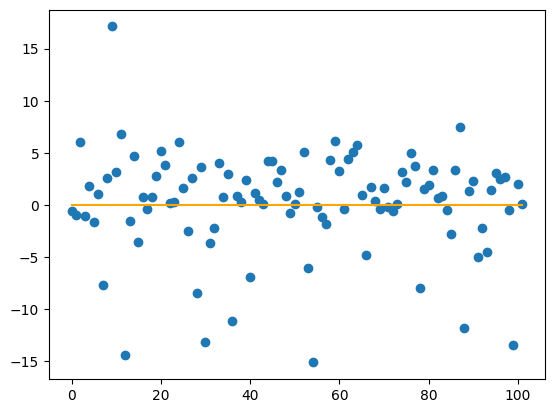

In [16]:
# 第二種: 模型評估方法 2：圖形:殘差圖 (residual plot):若預測點'都'離迴歸線很遠表示不準確
import matplotlib.pyplot as plt
# 資料長度
x = np.arange(pre.size)
y = x*0
plt.scatter(x, pre - target_test)
plt.plot(x, y, color='orange') # 劃出 y= 0 的基礎線
plt.show()

In [17]:
#模型評估方法 3：平均絕對誤差 (MAE, mean absolute error)
from sklearn.metrics import mean_absolute_error
# 測試資料答案跟預測結果
print(mean_absolute_error(target_test, pre).round(2))

3.41
